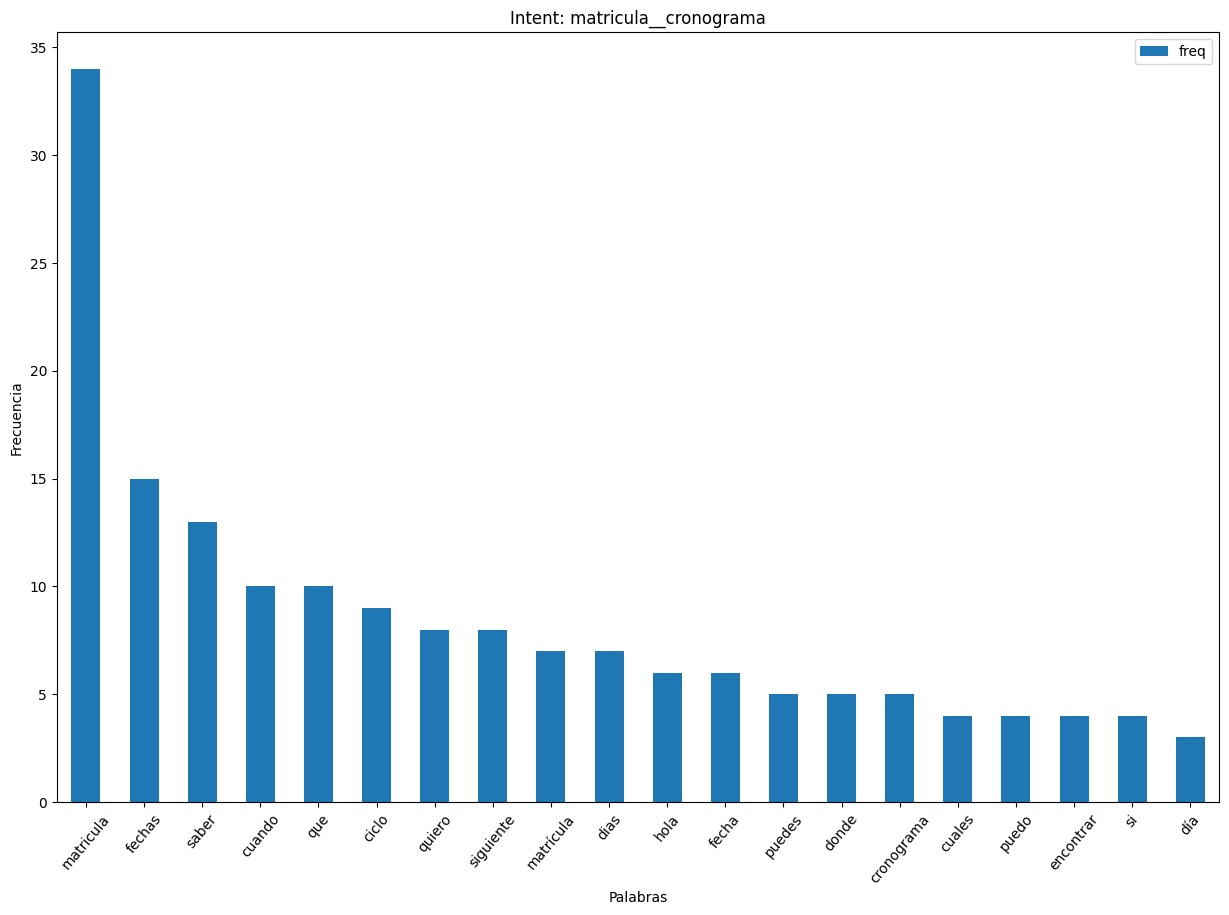

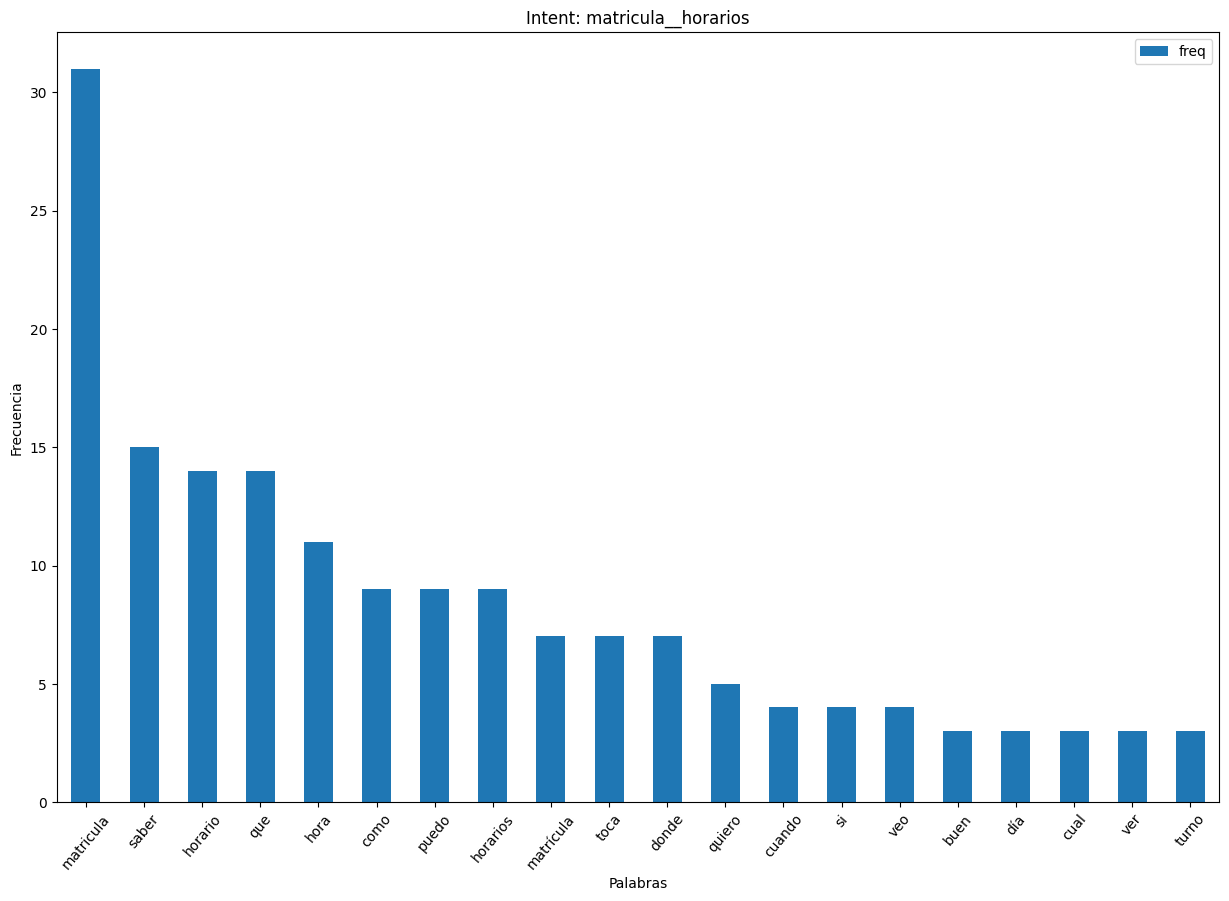

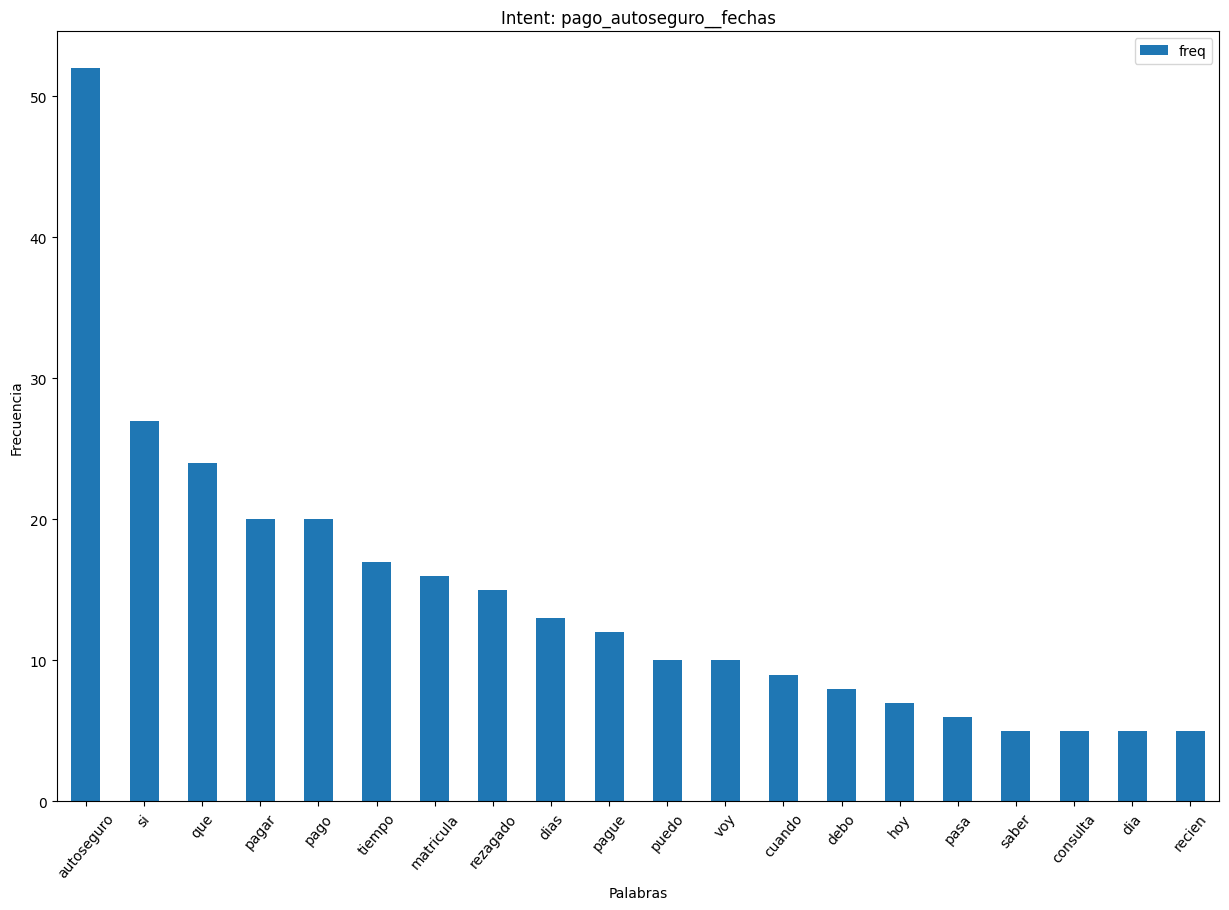

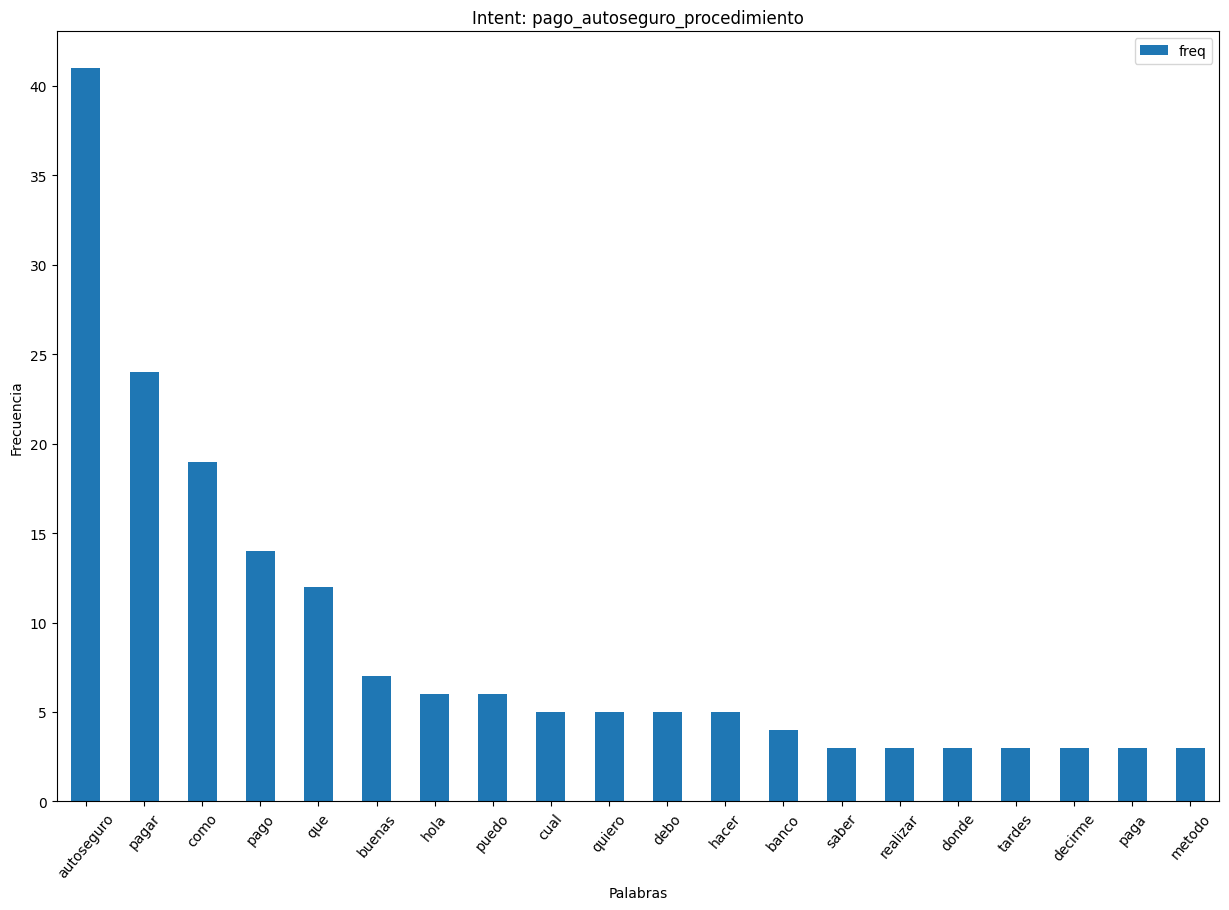

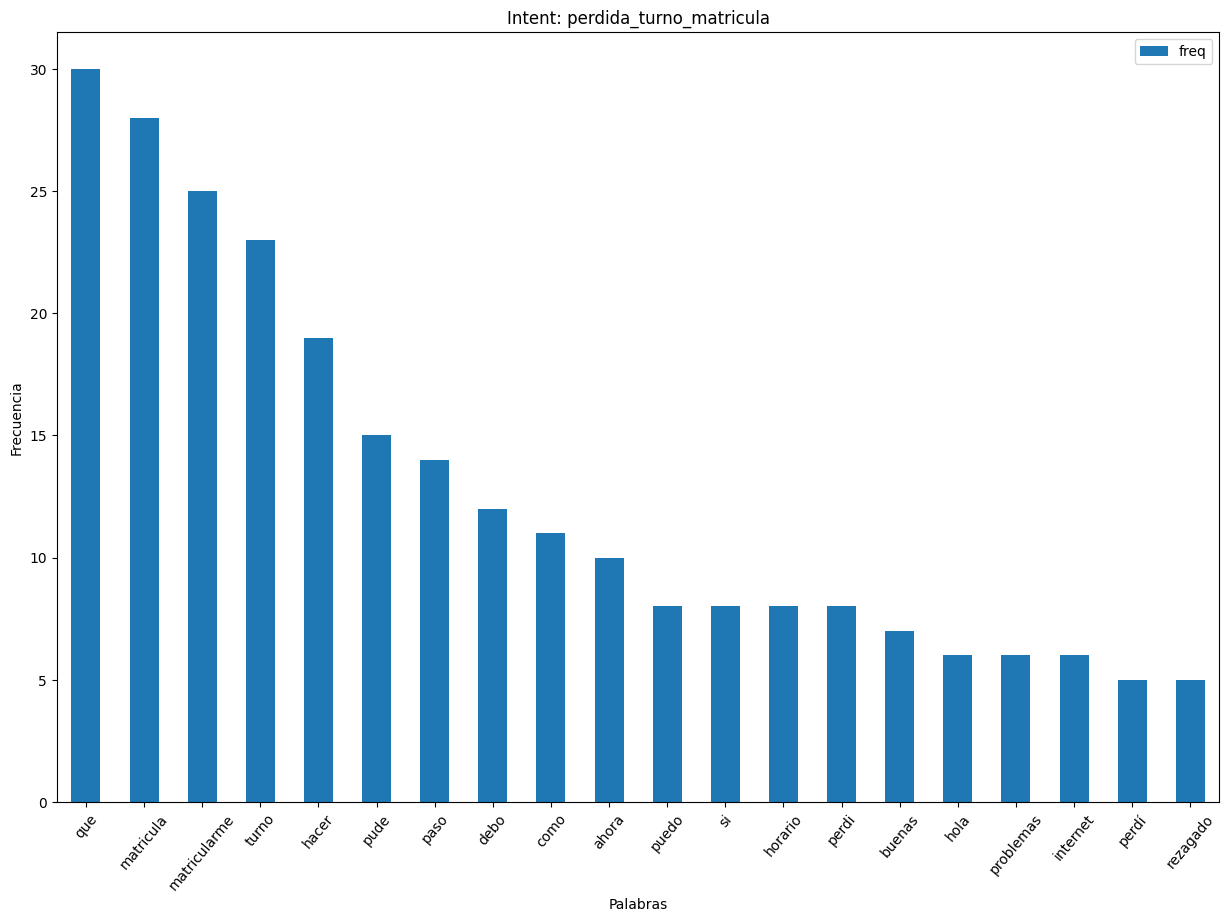

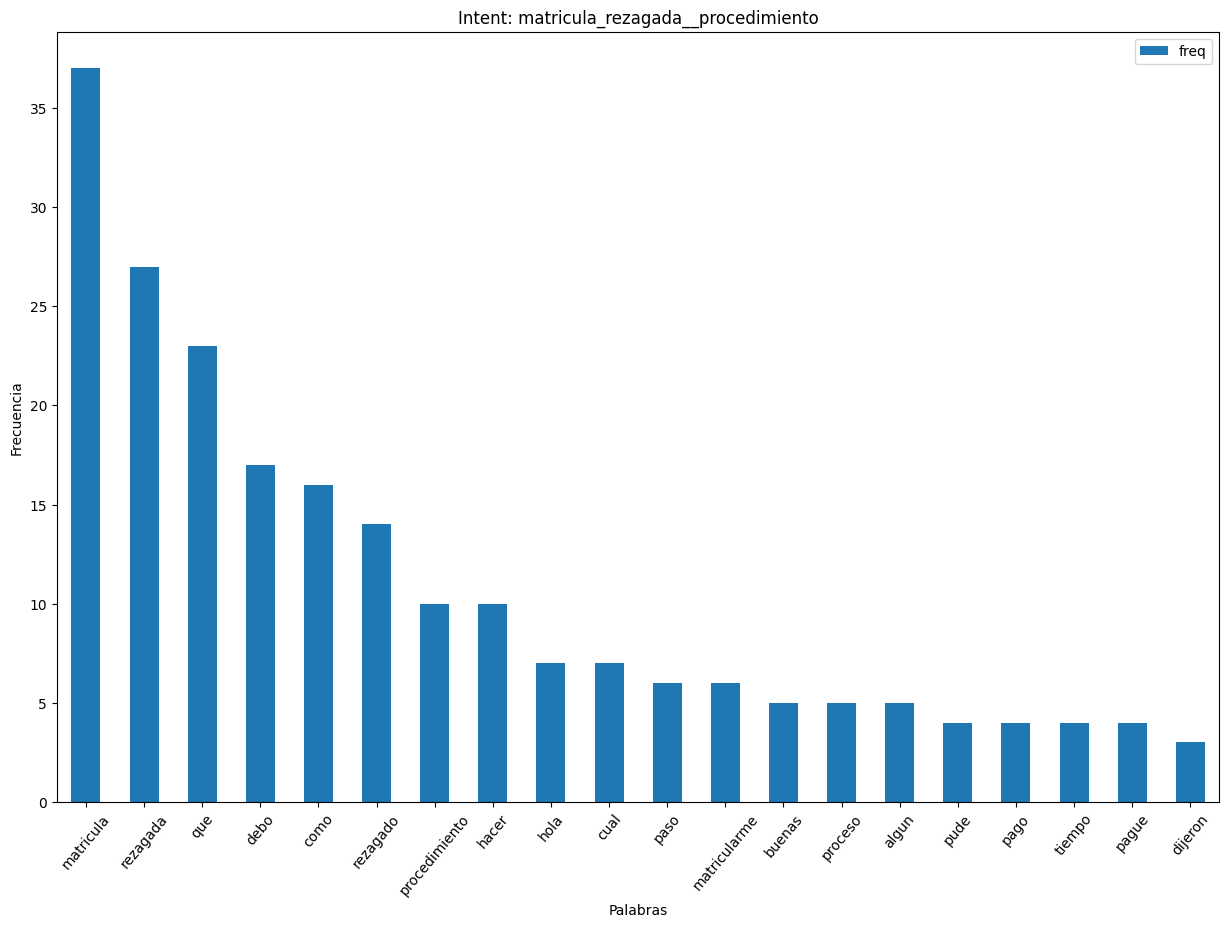

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy

nlp = spacy.load('es_core_news_md')

## Stop words

stop_words = stopwords.words('spanish')
marks = ["?",".", ",","¿"]
stop_words.extend(marks)

question_words = ['qué','que','quién','quien', 'cuál','cual', 'dónde','donde', 'cuándo','cuando', 'cómo','como', 'por qué','por que','porqué','porque', 
'cuánto','cuanto','cuantos']
stop_words = [ sw for sw in stop_words if not sw in question_words ]



def most_commons_words_texts(texts, n = 20):
    texts = [text.lower() for text in texts]
    all_texts = " ".join(texts)
    doc = nlp(all_texts)
    tokens = [str(token) for token in doc]
    tokens = [tok for tok in tokens if not tok in stop_words]

    freq = FreqDist(tokens)
    words_frecuency = freq.most_common(n)
    return words_frecuency

def plot_words_frecuency(words_frecuency, title = "Frecuencia de palabras"):
    pd.DataFrame(words_frecuency, columns=["word", "freq"]).set_index('word').plot.bar(figsize = (15,10))
    plt.xticks(rotation = 50)
    plt.xlabel("Palabras")
    plt.ylabel("Frecuencia")
    plt.title(title)
    plt.show()

## Find most common words

df = pd.read_csv('data_intents.csv')

intent_name = 'carnet_universitario__solicitud'


freqs = []
intents =df['intent_name'].unique().tolist()

for intent in intents:
    texts = df[df['intent_name'] == intent]['examples'].values.tolist()
    words_frecuency = most_commons_words_texts(texts)
    freqs.append({'intent': intent, "words_frecuency": words_frecuency})

## Any plots
n_plots = 6
start = 12
for freq in freqs[start:start + n_plots]:
    intent = freq['intent']
    words_frecuency = freq['words_frecuency']
    plot_words_frecuency(words_frecuency, title = f"Intent: {intent}")

In [2]:
## save most frecuency words
freqs[0]

{'intent': 'despedida',
 'words_frecuency': [('luego', 9),
  ('vemos', 8),
  ('ok', 6),
  ('adios', 5),
  ('que', 5),
  ('dia', 4),
  ('chau', 4),
  ('pronto', 4),
  ('buen', 3),
  ('aerito', 3),
  ('buenas', 2),
  ('noches', 2),
  ('gracias', 2),
  ('ayuda', 2),
  ('bye', 2),
  ('veo', 1),
  ('lindo', 1),
  ('adiós', 1),
  ('placer', 1),
  ('hablar', 1)]}

In [10]:
counter_words = {}
for row in freqs:
    words_frecuency = row['words_frecuency']
    for word, count in words_frecuency:
        if not word in counter_words:
            counter_words[word] = {"palabra": word , "frecuencia": count, "errores_ortograficos": []}
        else:
            counter_words[word]['frecuencia'] += count

table_most_frecuency_words = list(counter_words.values())

table_most_frecuency_words.sort(reverse= True,key = lambda e: e['frecuencia'])
table_most_frecuency_words

[{'palabra': 'que', 'frecuencia': 547, 'errores_ortograficos': []},
 {'palabra': 'matricula', 'frecuencia': 409, 'errores_ortograficos': []},
 {'palabra': 'puedo', 'frecuencia': 322, 'errores_ortograficos': []},
 {'palabra': 'retiro', 'frecuencia': 247, 'errores_ortograficos': []},
 {'palabra': 'solicitud', 'frecuencia': 241, 'errores_ortograficos': []},
 {'palabra': 'debo', 'frecuencia': 234, 'errores_ortograficos': []},
 {'palabra': 'como', 'frecuencia': 209, 'errores_ortograficos': []},
 {'palabra': 'constancia', 'frecuencia': 199, 'errores_ortograficos': []},
 {'palabra': 'hacer', 'frecuencia': 180, 'errores_ortograficos': []},
 {'palabra': 'ciclo', 'frecuencia': 142, 'errores_ortograficos': []},
 {'palabra': 'total', 'frecuencia': 130, 'errores_ortograficos': []},
 {'palabra': 'curso', 'frecuencia': 127, 'errores_ortograficos': []},
 {'palabra': 'quiero', 'frecuencia': 120, 'errores_ortograficos': []},
 {'palabra': 'autoseguro', 'frecuencia': 114, 'errores_ortograficos': []},
 {'p